# 20240915
★ shot grid 수정해야함.  그냥 단순히 step pitch로 쪼개놓은것임.-> 개선필요

1. Shot Left부분 그리기. 
   wafer정센터(0,0)에서 step_pitch의 절반만큼 -방향으로 이동. 
   
2. map shift 고려. 
   map shift만큼을 더해준다.

3. +방향에서는 step pitch만큼 n개씩 더해준다. 
   -방향에서는 step pitch만큼 m개씩 빼준다. 

# 20240915(2)
함수로 변경해줌

# 20240916
1. WF7.5로 테스트 해보기. OCM이랑 비교용
2. 화살표 머리부분 크기 조정. headwidth=2, headlength=3
3. 양수die, 음수die 정보를 매뉴얼로 넣어줘야하는 문제있음 -> max die, min die 정보를 활용. 대신에 vline, hline으로 나눠줘야함.

4. die x,y가 음수인 경우에 for문이 돌지않음. -> min에는 abs처리함.
5. shot left만 그려주는거라서 shot right부분 짤리는 경우있음 -> max_die + 2 처리해줌.(넉넉하게)
6. Die 위치 플롯기능은 삭제함.  die좌표계와 wf좌표계랑 안맞음.. 
   -> def plot_overlay(x, y, dx, dy, v_lines, h_lines, die_x, die_y, wafer_radius=150000, title='Wafer Vector Map'): 에서 die_x, die_y 삭제함.

7. lot_id 개별로 표현

# 20240917
1. subplot으로 여러개 plot정리하기
2. 확대했을때 크기 키움.  fig, axes = plt.subplots(1, 5, figsize=(50, 10))
3. scale bar 추가
4. scale bar와 scale_factor간에 연동되게 변경
   import matplotlib.pyplot as plt
   import matplotlib.patches as patches
   from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
   import matplotlib.font_manager as fm

  # 스케일 바 추가
    fontprops = fm.FontProperties(size=10)
    scalebar = AnchoredSizeBar(ax.transData,
                               30000,  # 데이터 좌표에서의 스케일 바 길이 (기본 길이)
                               scale_bar_label,  # 스케일 바 레이블 (계산된 값 사용)
                               'lower center',  # 스케일 바 위치
                               pad=0.1,
                               color='black',
                               frameon=False,
                               size_vertical=500,  # 스케일 바 두께
                               fontproperties=fontprops)
    ax.add_artist(scalebar)
    


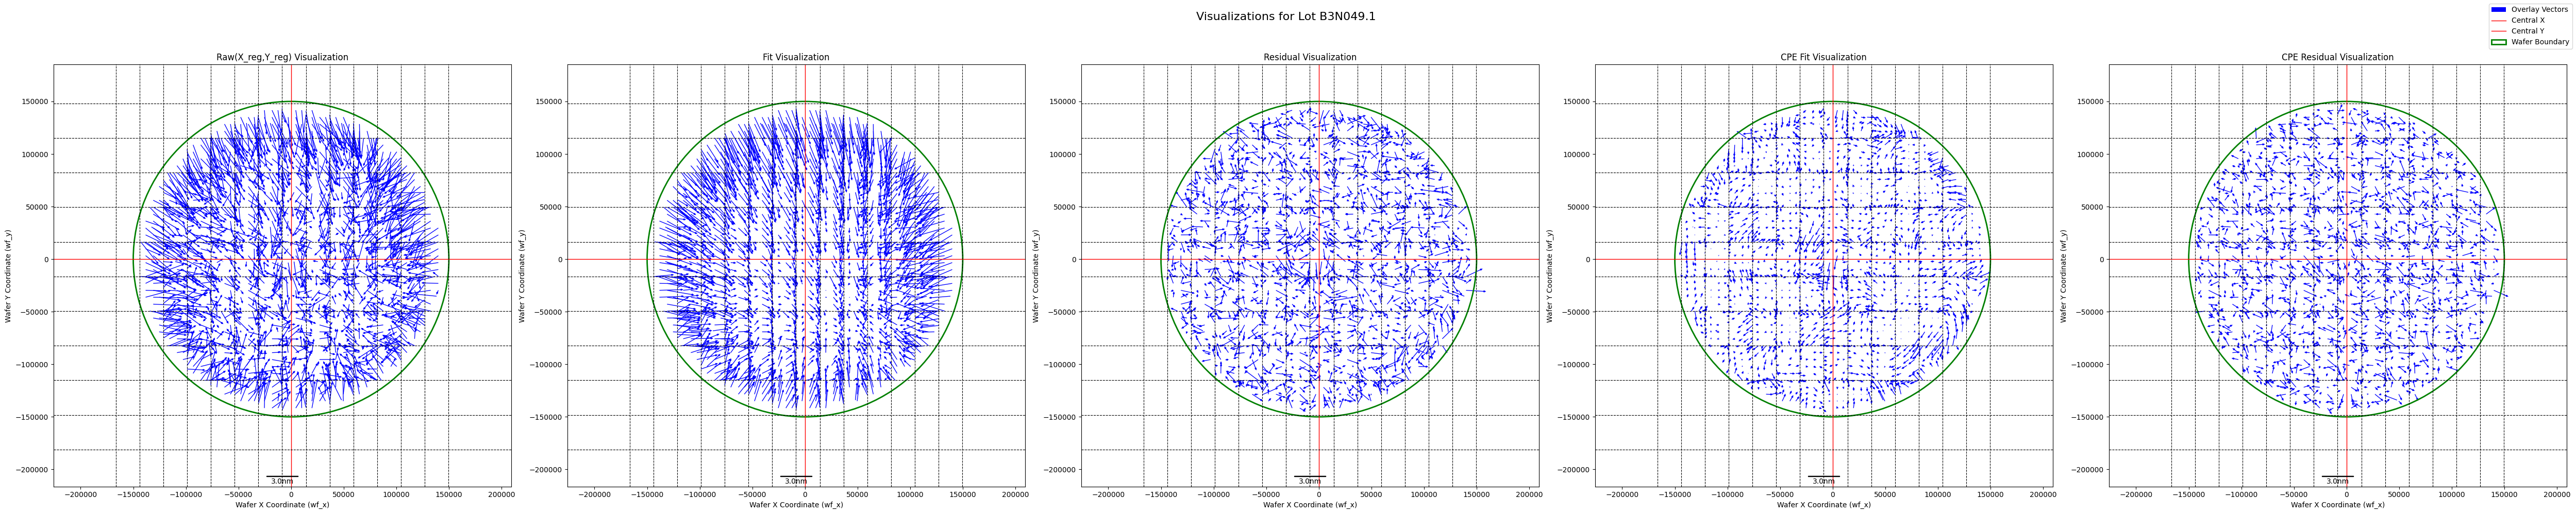

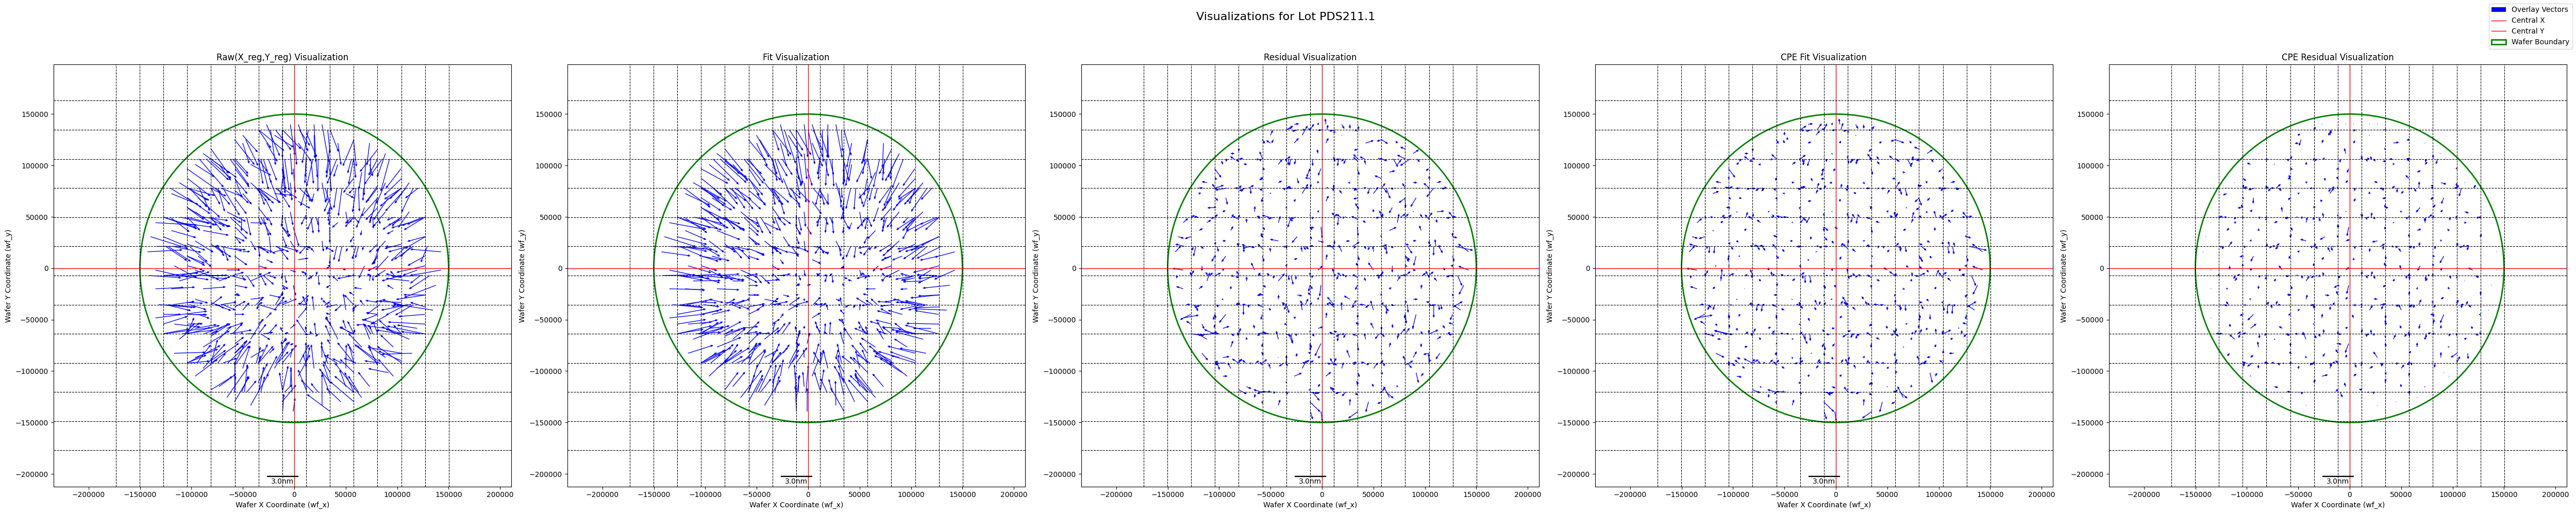

In [22]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm



# 세로선을 계산하는 함수
def calculate_vlines(center, pitch, max_die_x, min_die_x):
    lines = []

    # 양의 방향
    current = center
    for _ in range(max_die_x + 2):  # max_die_x 방향으로 라인을 그리기 위한 반복
        lines.append(current)
        current += pitch

    # 음의 방향
    current = center
    for _ in range(abs(min_die_x) + 1):  # min_die_x의 절대값만큼 라인을 그리기 위한 반복
        current -= pitch
        lines.append(current)
    return lines

# 가로선을 계산하는 함수
def calculate_hlines(center, pitch, max_die_y, min_die_y ):
    lines = []
  
    # 양의 방향
    current = center
    for _ in range(max_die_y + 2):  # max_die_y 방향으로 라인을 그리기 위한 반복
        lines.append(current)
        current += pitch
    
    # 음의 방향
    current = center
    for _ in range(abs(min_die_y) + 1):  # min_die_y의 절대값만큼 라인을 그리기 위한 반복
        current -= pitch
        lines.append(current)
    return lines

# Overlay를 플롯하는 함수 (Axes 객체를 인자로 받도록 수정)
def plot_overlay(ax, x, y, dx, dy, v_lines, h_lines, wafer_radius=150000, title='Wafer Vector Map', scale_factor=1e-7):
    # Quiver 플롯
    ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=scale_factor, color='blue', label='Overlay Vectors',
              width=0.0015, headwidth=3, headlength=3)

    # 중앙선
    ax.axvline(0, color='red', linewidth=1.0, label='Central X')
    ax.axhline(0, color='red', linewidth=1.0, label='Central Y')

    # 수직선 추가
    for vline in v_lines:
        ax.axvline(vline, color='black', linestyle='--', linewidth=0.8)

    # 수평선 추가
    for hline in h_lines:
        ax.axhline(hline, color='black', linestyle='--', linewidth=0.8)

    # 웨이퍼 경계 원 추가
    wafer_circle = plt.Circle((0, 0), wafer_radius, color='green', fill=False, linestyle='-', linewidth=2, label='Wafer Boundary')
    ax.add_patch(wafer_circle)



    # 스케일 바 길이를 scale_factor에 따라 계산
    scale_bar_length = 30000 * scale_factor  # 30000은 원하는 기본 길이. 필요에 따라 변경 가능
    scale_bar_label = f'{scale_bar_length * 1e3:.1f}nm'  # 스케일 바에 표시될 값 (nm로 변환)


    # 스케일 바 추가
    fontprops = fm.FontProperties(size=10)
    scalebar = AnchoredSizeBar(ax.transData,
                               30000,  # 데이터 좌표에서의 스케일 바 길이 (기본 길이)
                               scale_bar_label,  # 스케일 바 레이블 (계산된 값 사용)
                               'lower center',  # 스케일 바 위치
                               pad=0.1,
                               color='black',
                               frameon=False,
                               size_vertical=500,  # 스케일 바 두께
                               fontproperties=fontprops)
    ax.add_artist(scalebar)
 
    # 축 설정 및 제목 추가
    ax.set_xlabel('Wafer X Coordinate (wf_x)')
    ax.set_ylabel('Wafer Y Coordinate (wf_y)')
    ax.set_title(title)
    ax.axis('equal')
    ax.grid(False)

    # 범례는 메인 서브플롯에 추가
    # ax.legend()

# 메인 스크립트
def main():
    # 엑셀 파일 읽기
    file_path = 'C:/vscode/MODULE/wafermap/output.xlsx'  # 실제 파일 경로로 업데이트
    sheet_name = 'RawData-1'

    # 엑셀 파일 읽기
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    # 'lot_id'의 고유 값 리스트 추출
    lot_ids = df['LOT_ID'].unique()

    for lot_id in lot_ids:
        df_lot = df[df['LOT_ID'] == lot_id]
                
        # 데이터 열 추출
        wf_x = df_lot['wf_x']
        wf_y = df_lot['wf_y']
        overlay_x = df_lot['X_reg']
        overlay_y = df_lot['Y_reg']
        fit_x = df_lot['pred_x']
        fit_y = df_lot['pred_y']
        residual_x = df_lot['residual_x']
        residual_y = df_lot['residual_y']
        cpe_fit_x = df_lot['cpe_pred_x']
        cpe_fit_y = df_lot['cpe_pred_y']
        cpe_resi_x = df_lot['cpe_resi_x']
        cpe_resi_y = df_lot['cpe_resi_y']
        
        # STEP_PITCH_X, STEP_PITCH_Y 추출
        step_pitch_x = df_lot['STEP_PITCH_X'].iloc[0]
        step_pitch_y = df_lot['STEP_PITCH_Y'].iloc[0]
        map_shift_x = df_lot['MAP_SHIFT_X'].iloc[0]
        map_shift_y = df_lot['MAP_SHIFT_Y'].iloc[0]
        start_left = -(step_pitch_x)/2 + map_shift_x
        start_bottom = -(step_pitch_y)/2 + map_shift_y
        max_die_x = max(df_lot['DieX'])
        min_die_x = min(df_lot['DieX'])
        max_die_y = max(df_lot['DieY'])
        min_die_y = min(df_lot['DieY'])     

        # 수직선 및 수평선 계산
        vertical_lines = calculate_vlines(start_left, step_pitch_x, max_die_x, min_die_x)
        horizontal_lines = calculate_hlines(start_bottom, step_pitch_y, max_die_y, min_die_y)
        
        # 서브플롯 레이아웃 설정 (예: 5개의 플롯을 2행 3열로 배치)
        fig, axes = plt.subplots(1, 5, figsize=(50, 10))  # 필요한 서브플롯 수에 맞게 조정
        fig.suptitle(f'Visualizations for Lot {lot_id}', fontsize=16)

        # raw 플로팅
        plot_overlay(
            ax=axes[0],
            x=wf_x,
            y=wf_y,
            dx=overlay_x,
            dy=overlay_y,
            v_lines=vertical_lines,
            h_lines=horizontal_lines,
            wafer_radius=150000,
            title='Raw(X_reg,Y_reg) Visualization'
        )

        # fit 플로팅
        plot_overlay(
            ax=axes[1],
            x=wf_x,
            y=wf_y,
            dx=fit_x,
            dy=fit_y,
            v_lines=vertical_lines,
            h_lines=horizontal_lines,
            wafer_radius=150000,
            title='Fit Visualization'
        )

        # residual 플로팅
        plot_overlay(
            ax=axes[2],
            x=wf_x,
            y=wf_y,
            dx=residual_x,
            dy=residual_y,
            v_lines=vertical_lines,
            h_lines=horizontal_lines,
            wafer_radius=150000,
            title='Residual Visualization',
            # scale_factor=3e-8
        )

        # cpe_fit 플로팅
        plot_overlay(
            ax=axes[3],
            x=wf_x,
            y=wf_y,
            dx=cpe_fit_x,
            dy=cpe_fit_y,
            v_lines=vertical_lines,
            h_lines=horizontal_lines,
            wafer_radius=150000,
            title='CPE Fit Visualization',
            # scale_factor=3e-8
        )

        # cpe_residual 플로팅
        plot_overlay(
            ax=axes[4],
            x=wf_x,
            y=wf_y,
            dx=cpe_resi_x,
            dy=cpe_resi_y,
            v_lines=vertical_lines,
            h_lines=horizontal_lines,
            wafer_radius=150000,
            title='CPE Residual Visualization',
            # scale_factor=3e-8
        )

          

        # 범례 추가 (중앙에 하나만 추가)
        handles, labels = axes[0].get_legend_handles_labels()
        if handles and labels:
            fig.legend(handles, labels, loc='upper right')

        plt.tight_layout(rect=[0, 0, 1, 0.95])  # 상단 제목을 위해 약간의 여백 조정
        plt.show()

if __name__ == "__main__":
    main()



